In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("HR Employee Attrition.csv")
plt.style.use("seaborn-v0_8")


In [29]:
df.shape
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
#Exploratory Data Analysis (EDA)

df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [31]:
df['Attrition'].value_counts(normalize=True) * 100


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [32]:
pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100


Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


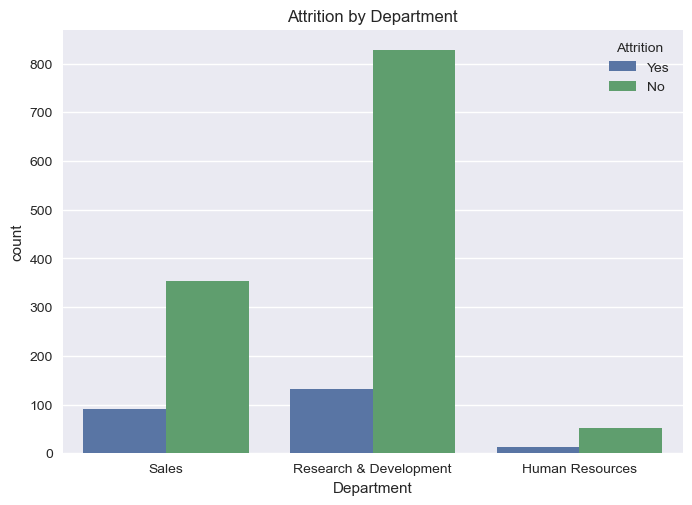

In [33]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.show()


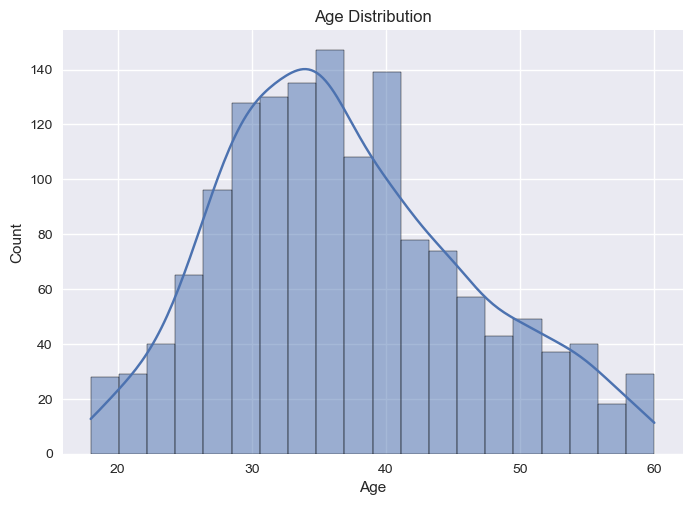

In [34]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


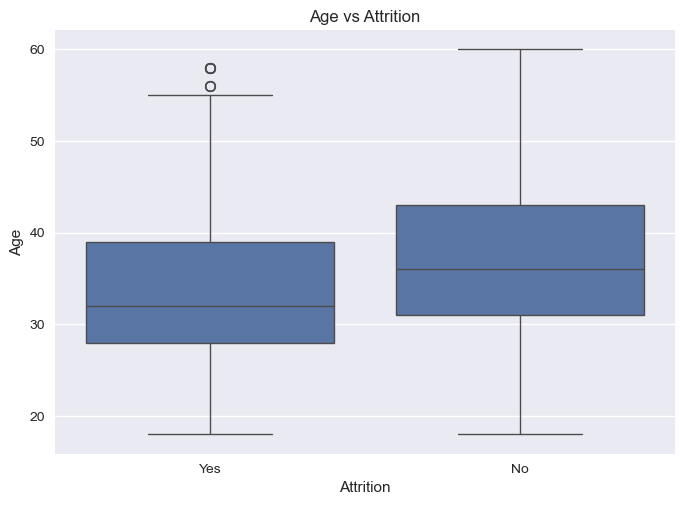

In [35]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()


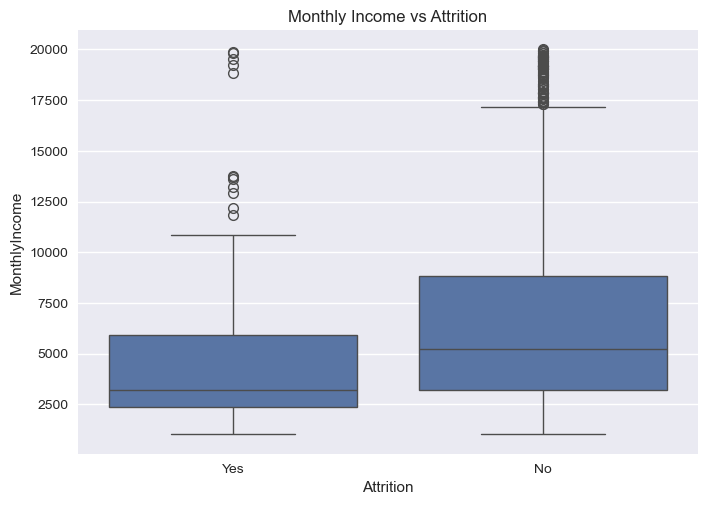

In [36]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


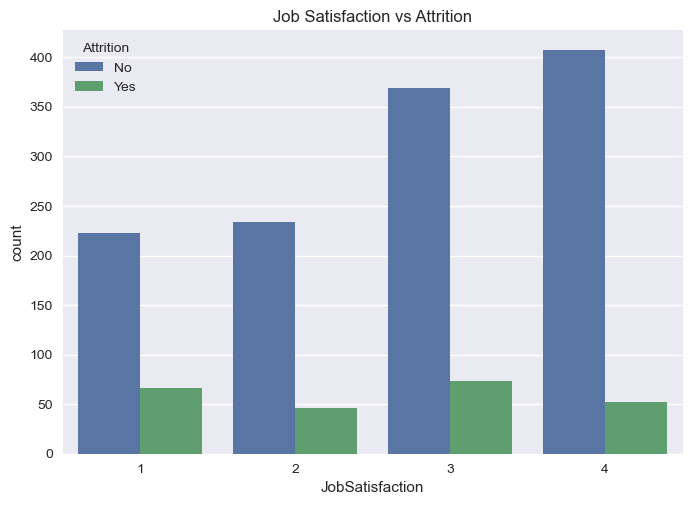

In [37]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()


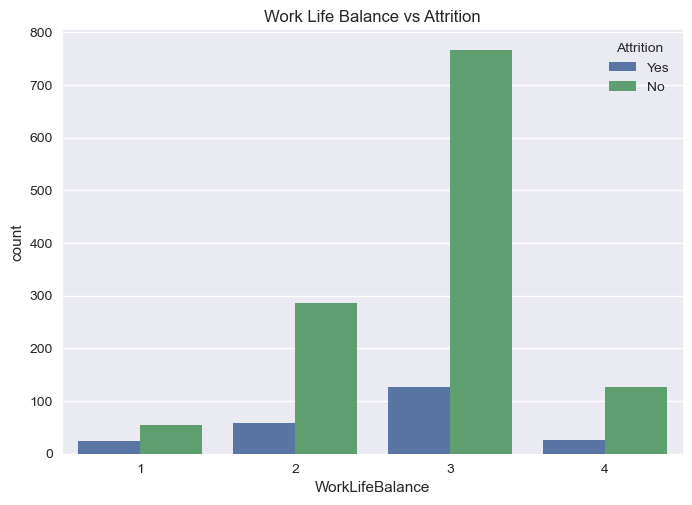

In [38]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("Work Life Balance vs Attrition")
plt.show()


In [39]:
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100


Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


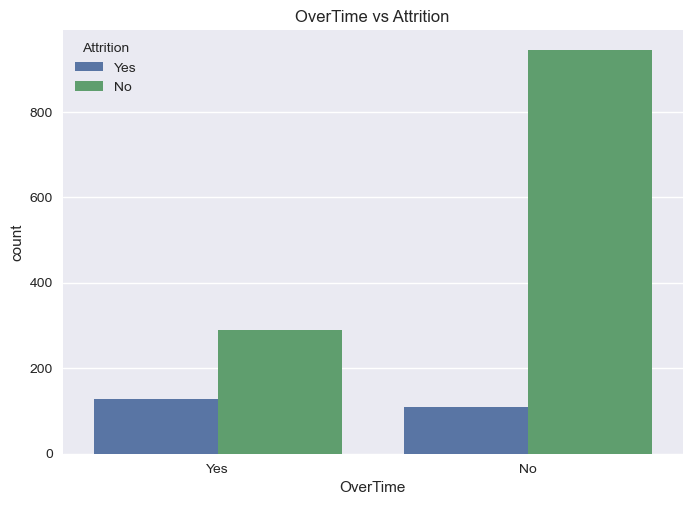

In [40]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.show()


In [41]:
df['PromotionGap'] = pd.cut(
    df['YearsSinceLastPromotion'],
    bins=[-1, 1, 3, 5, 10, 20],
    labels=['≤1 year', '1–3 years', '3–5 years', '5–10 years', '10+ years']
)


In [42]:
pd.crosstab(df['PromotionGap'], df['Attrition'], normalize='index') * 100


Attrition,No,Yes
PromotionGap,,
≤1 year,83.049041,16.950959
1–3 years,82.938389,17.061611
3–5 years,93.396226,6.603774
5–10 years,81.879195,18.120805
10+ years,87.878788,12.121212


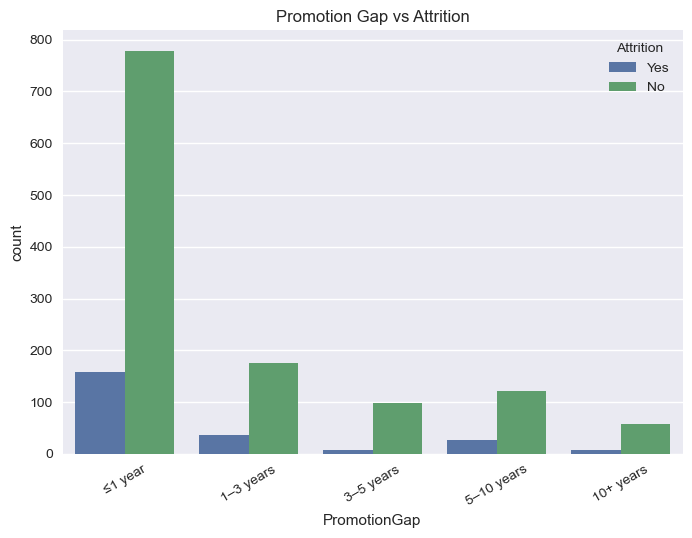

In [43]:
sns.countplot(x='PromotionGap', hue='Attrition', data=df)
plt.title("Promotion Gap vs Attrition")
plt.xticks(rotation=30)
plt.show()


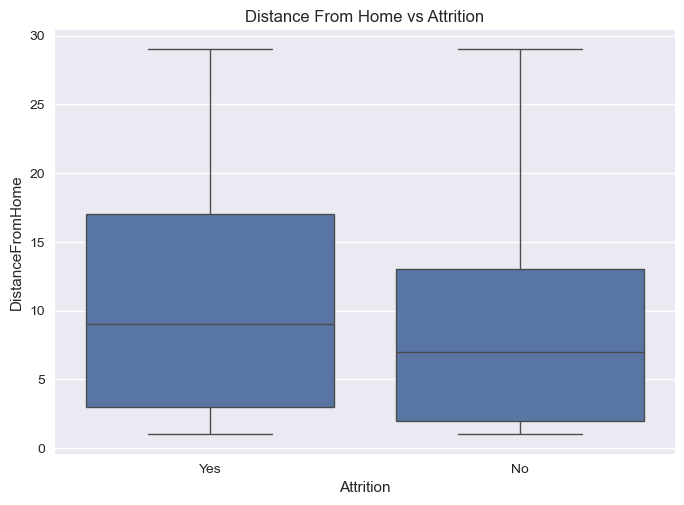

In [44]:
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title("Distance From Home vs Attrition")
plt.show()


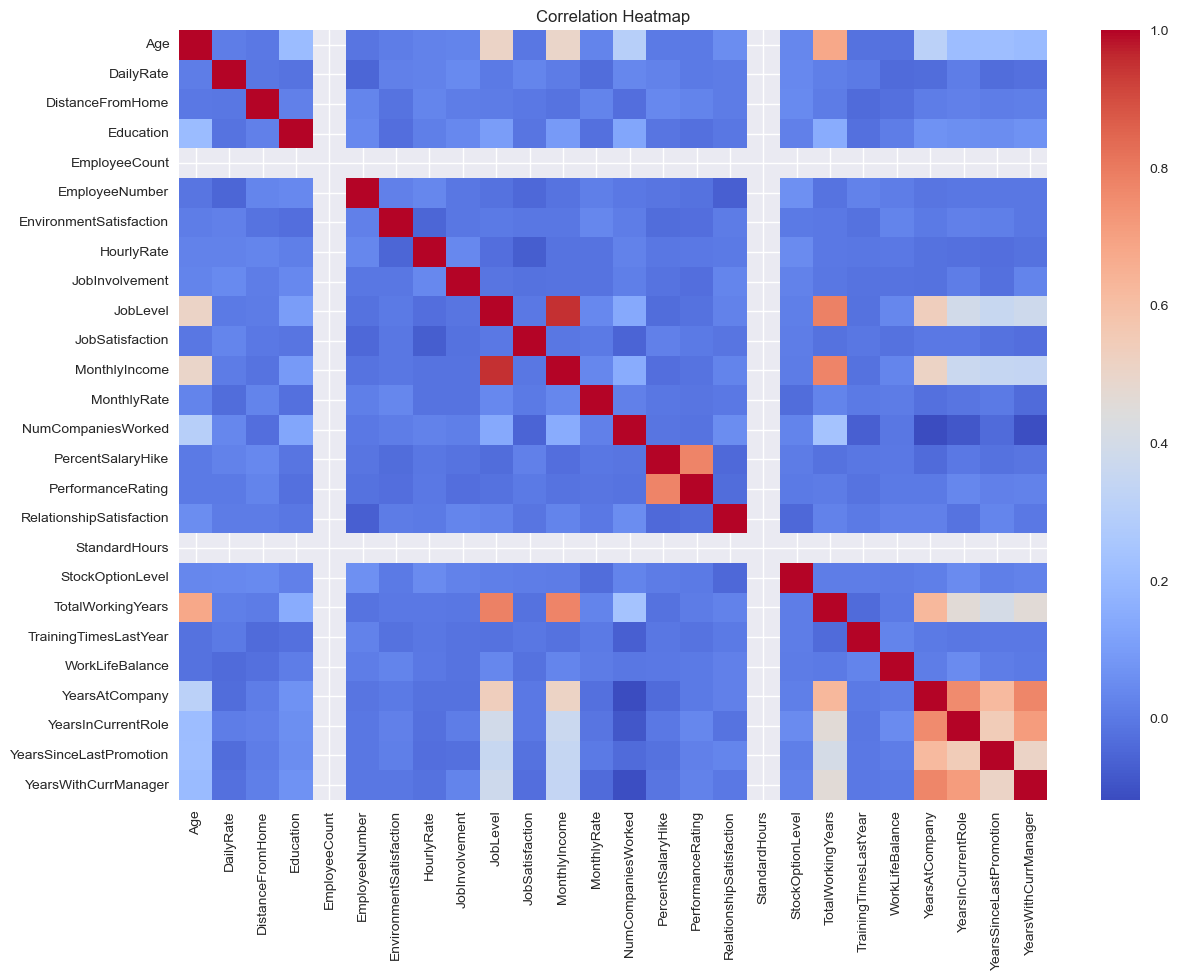

In [45]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
y = df['Attrition'].map({'Yes': 1, 'No': 0})
X = df.drop('Attrition', axis=1)


In [47]:
#Encode categorical variables
X = pd.get_dummies(X, drop_first=True)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [49]:
#Model Training (Logistic Regression)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [50]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)


0.8605442176870748

In [51]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[238,   9],
       [ 32,  15]])